# Evaluate

### Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import math
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Exercises
Do your work for this exercise in a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

### 1. Load the tips dataset from either pydataset or seaborn.

In [7]:
from pydataset import data
df = data("tips")
df.head()



,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
x = df[['total_bill']]
y = df[['tip']]
df2 = pd.concat([x,y], axis=1)
df2



,total_bill,tip
1,16.99,1.01
2,10.34,1.66
3,21.01,3.50
4,23.68,3.31
5,24.59,3.61
...,...,...
240,29.03,5.92
241,27.18,2.00
242,22.67,2.00
243,17.82,1.75


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.
- Here is some sample code to get you started:

In [4]:
#baseline
df2['yhat_baseline'] = df2['tip'].mean()
df2



,total_bill,tip,yhat_baseline
1,16.99,1.01,2.998279
2,10.34,1.66,2.998279
3,21.01,3.50,2.998279
4,23.68,3.31,2.998279
5,24.59,3.61,2.998279
...,...,...,...
240,29.03,5.92,2.998279
241,27.18,2.00,2.998279
242,22.67,2.00,2.998279
243,17.82,1.75,2.998279


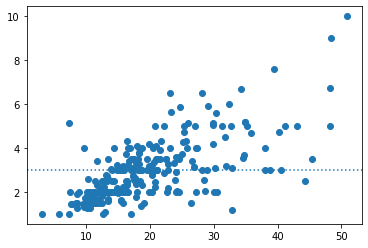

In [5]:
# plot data with baseline:
plt.scatter(df.total_bill, df.tip)
plt.axhline(df.tip.mean(), ls = ':')



In [6]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.
from statsmodels.formula.api import ols

# generate parameters, i.e. create model
model = ols('tip ~ total_bill', data=df2).fit()

# compute predictions and add to original dataframe
predictions = model.predict(df.total_bill)



#### The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

In [7]:
df2['yhat'] = predictions



In [8]:
df2.head()



,total_bill,tip,yhat_baseline,yhat
1,16.99,1.01,2.998279,2.704636
2,10.34,1.66,2.998279,2.006223
3,21.01,3.50,2.998279,3.126835
4,23.68,3.31,2.998279,3.407250
5,24.59,3.61,2.998279,3.502822


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

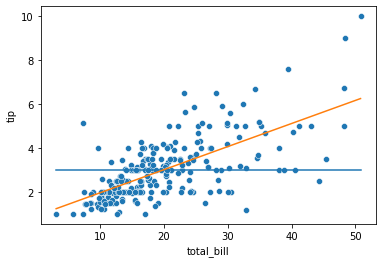

In [9]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = df2)
sns.lineplot(x = 'total_bill', y = 'yhat_baseline', data = df2)
sns.lineplot(x = 'total_bill', y = 'yhat', data = df2)



### 3. Plot the residuals for the linear regression model that you made.

In [10]:
df2['residual'] = df2.tip - df2.yhat
df2['baseline_residual'] = df2.tip - df2.yhat_baseline



In [11]:
df2



,total_bill,tip,yhat_baseline,yhat,residual,baseline_residual
1,16.99,1.01,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,2.998279,3.502822,0.107178,0.611721
...,...,...,...,...,...,...
240,29.03,5.92,2.998279,3.969131,1.950869,2.921721
241,27.18,2.00,2.998279,3.774836,-1.774836,-0.998279
242,22.67,2.00,2.998279,3.301175,-1.301175,-0.998279
243,17.82,1.75,2.998279,2.791807,-1.041807,-1.248279


In [12]:
# sum of residual is zero
df2.residual.sum()

2.2737367544323206e-13

In [13]:
# sum of baseline residual is zero too
df2.baseline_residual.sum()

-2.4868995751603507e-14

#### Sum of residual is zero for both model above so 'residuals' are not helpful in finding the line of best fit

### Residual Plots

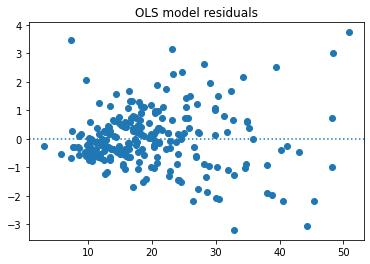

In [14]:
# Independent variable vs residual values
plt.scatter(df2.total_bill, df2.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');


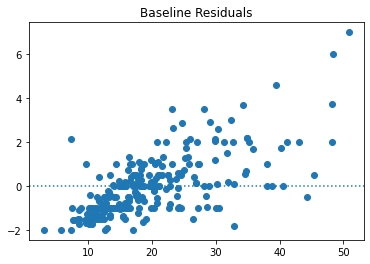

In [15]:
# dependent variable vs residual values
plt.scatter(df2.total_bill, df2.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.title('Baseline Residuals');


### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

### SSE (Sum of Squared Errors)
The value of the SSE is derived by simply squaring each of the errors computed in step one and summing them all together.

In [16]:
#manually
#sum of the squared residuals
df2['residual^2'] = df2.residual**2
df2['baseline_residual^2'] = df2.baseline_residual**2
df2.head()

,total_bill,tip,yhat_baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
1,16.99,1.01,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [17]:
SSE = df2['residual^2'].sum()
SSE_baseline = df2['baseline_residual^2'].sum()


In [18]:
#In regression, the 'line of best fit' is one which minimizes the SSE
print("SSE = ", SSE)
print("SSE Baseline = ", SSE_baseline)


SSE =  252.788743850776
SSE Baseline =  465.2124770491804


In [19]:
#scikit learn
from sklearn.metrics import mean_squared_error

SSE2 = mean_squared_error(df2.tip, df2.yhat)*len(df)
SSE2_baseline = mean_squared_error(df2.tip, df2.yhat_baseline)*len(df)

print("SSE = ", SSE2)
print("SSE Baseline = ", SSE2_baseline)

SSE =  252.788743850776
SSE Baseline =  465.2124770491804


### ESS (Explained Sum of Squares)
The ESS (Explained Sum of Squares) is the sum of the difference between the each predicted value (predicted final grade, in this example) and the mean of all actual values (again, final grades).

In [20]:
# compute explained sum of squares
ESS = sum((df2.yhat - df2.tip.mean())**2)

In [21]:
ESS

212.4237331984042

### TSS (Total Sum of Squares)
The TSS (Total Sum of Squares) is the sum of difference between the actual tip and the mean of all tips. It can also be derived by summing the ESS and SSE.

In [25]:
ESS = sum((df2.yhat - df2.yhat_baseline)**2)
ESS


212.4237331984042

In [27]:
TSS = ESS + SSE
TSS

465.21247704918017

### MSE (Mean Squared Error)
- average of SSE = SSE/(no. of data points)
- the average of your errors that have each been squared

In [22]:
len(df2)
df2.shape[0]

244

In [23]:
MSE = SSE/len(df2)
MSE_baseline = SSE_baseline/len(df2)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  1.036019442011377
MSE baseline =  1.906608512496641


### RMSE (Root Mean Squared Error)¶
- Square root of MSE
- Same units as the output (y) variable

In [24]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)
print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298954


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [28]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE', 'RMSE' ]), columns=['metric'])
df_eval['model_error'] =np.array([SSE, MSE, RMSE])
df_eval


,metric,model_error
0,SSE,252.788744
1,MSE,1.036019
2,RMSE,1.017850


In [29]:
df_eval['baseline_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])
df_eval


,metric,model_error,baseline_error
0,SSE,252.788744,465.212477
1,MSE,1.036019,1.906609
2,RMSE,1.017850,1.380800


In [31]:
df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error

In [32]:
df_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


In [ ]:
#sum of squared errors function

from sklearn.metrics import mean_squared_error

def sum_squared_errors(y, yhat):
    SSE = mean_squared_error(df.y, df.yhat)*len(df)
    SSE_baseline = mean_squared_error(df.y, df.yhat_baseline)*len(df)
    print("SSE = ", SSE)
    print("SSE - baseline = ", SSE_baseline)
    if SSE < SSE_baseline:
        print("Model performs better than the baseline")
    else:
        print("Model does not perform better than the baseline")
        


### 7. What is the amount of variance explained in your model?

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        20:41:22   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
print('R2: ', model.rsquared)


R2:  0.45661658635167646


In [35]:
print('R2: ', model.rsquared_adj)


R2:  0.4543712003448651


In [36]:
print('Parameters: ', model.params)


Parameters:  Intercept     0.920270
total_bill    0.105025
dtype: float64


### 8. Is your model significantly better than the baseline model?

### 9. Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
- model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [37]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

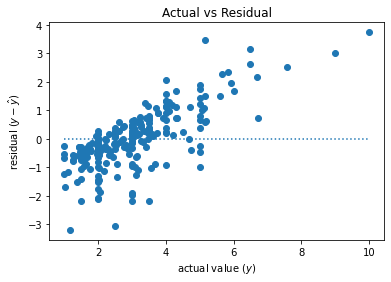

In [38]:
plot_residuals(df2.tip, df2.yhat)

In [17]:

def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()


In [16]:

def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline

def model_significance(ols_model):
    return {
        'r^2 -- variance explained': ols_model.rsquared,
        'p-value -- P(data|model == baseline)': ols_model.f_pvalue,
    }

In [44]:
better_than_baseline(df2.tip, df2.yhat)


True

In [45]:
model_significance(model)

{'r^2 -- variance explained': 0.45661658635167646,
 'p-value -- P(data|model == baseline)': 6.692470646863376e-34}

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [8]:
mpg = data('mpg')

In [9]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


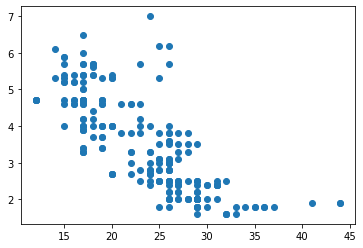

In [10]:
plt.scatter(mpg.hwy, mpg.displ)


In [12]:
from statsmodels.formula.api import ols

model1 = ols('hwy ~ displ', data=mpg).fit()  
predictions = model1.predict(mpg.displ)

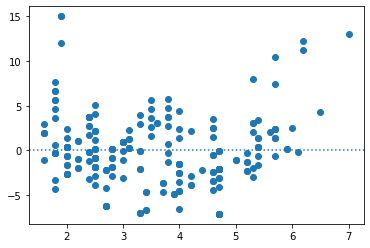

In [13]:
plt.scatter(mpg.displ, (mpg.hwy - predictions))
plt.axhline(0, ls = ':')

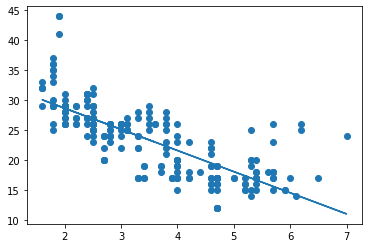

In [14]:

plt.scatter(mpg.displ, mpg.hwy)
plt.plot(mpg.displ, predictions)

In [18]:
regression_errors(mpg.hwy, predictions)


sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
dtype: float64

In [19]:
better_than_baseline(mpg.hwy, predictions)

True

In [20]:
model_significance(model1)

{'r^2 -- variance explained': 0.5867866723989039,
 'p-value -- P(data|model == baseline)': 2.0389744555910457e-46}

In [21]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hwy   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     329.5
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.04e-46
Time:                        22:34:27   Log-Likelihood:                -645.62
No. Observations:                 234   AIC:                             1295.
Df Residuals:                     232   BIC:                             1302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6977      0.720     49.555      0.000      34.278      37.117
displ         -3.5306      0.195    -18.151      0.000      -3.914      -3.147
==============================================================================
Omnibus:                       45.280   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.192
Skew:                           0.961   Prob(JB):                     2.60e-20
Kurtosis:                       5.357   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""